In [89]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI5 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI5")
X_train = DKI5.index.values.reshape(-1, 1)
y_train = DKI5['NO2'].values.reshape(-1,)

gamma_value = 0.03
C_value=300

## Laplacian Kernel

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['NO2'].min()
max_par = DKI5['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.084
MSE: 0.007
MAE: 0.070
R-Squared: -0.705
       Tanggal       NO2
0   2022-11-30  1.492537
1   2022-12-01  1.641791
2   2022-12-02  1.791045
3   2022-12-03  1.940299
4   2022-12-04  2.238806
5   2022-12-05  2.388060
6   2022-12-06  2.537313
7   2022-12-07  2.686567
8   2022-12-08  2.835821
9   2022-12-09  2.985075
10  2022-12-10  3.582090
11  2022-12-11  3.731343
12  2022-12-12  3.880597
13  2022-12-13  4.179104
14  2022-12-14  4.328358
15  2022-12-15  4.477612
16  2022-12-16  4.776119
17  2022-12-17  5.074627
18  2022-12-18  5.223881
19  2022-12-19  5.373134
20  2022-12-20  5.522388
21  2022-12-21  5.820896
22  2022-12-22  5.970149
23  2022-12-23  6.119403
24  2022-12-24  6.417910
25  2022-12-25  6.567164
26  2022-12-26  6.567164
27  2022-12-27  6.716418
28  2022-12-28  6.865672
29  2022-12-29  7.014925


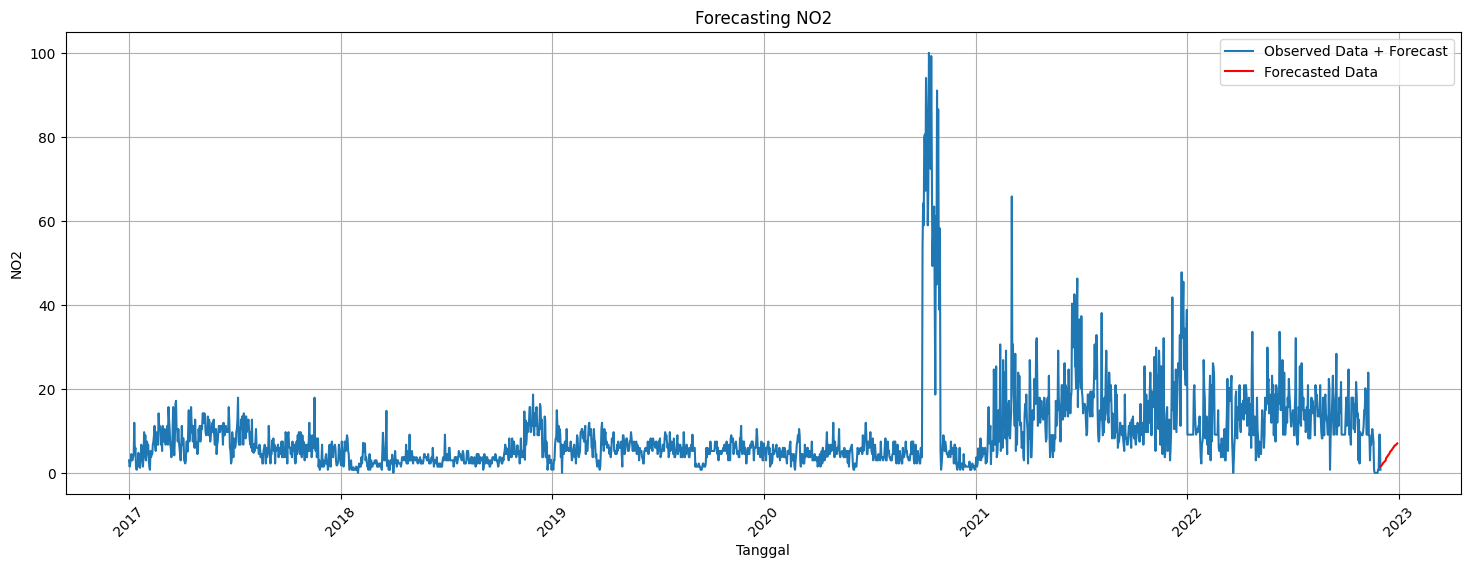

In [91]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['NO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['NO2'].min()
max_par = DKI5['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.132
MSE: 0.018
MAE: 0.122
R-Squared: -3.218
       Tanggal        NO2
0   2022-11-30   0.000000
1   2022-12-01   0.000000
2   2022-12-02   0.000000
3   2022-12-03   0.000000
4   2022-12-04   0.000000
5   2022-12-05   0.000000
6   2022-12-06   0.000000
7   2022-12-07   0.000000
8   2022-12-08   0.000000
9   2022-12-09   1.641791
10  2022-12-10   5.223881
11  2022-12-11   8.208955
12  2022-12-12  12.686567
13  2022-12-13  14.925373
14  2022-12-14  16.417910
15  2022-12-15  16.417910
16  2022-12-16  16.417910
17  2022-12-17  16.417910
18  2022-12-18  16.417910
19  2022-12-19  16.417910
20  2022-12-20  16.417910
21  2022-12-21  16.417910
22  2022-12-22  16.417910
23  2022-12-23  16.417910
24  2022-12-24  16.417910
25  2022-12-25  16.417910
26  2022-12-26  16.417910
27  2022-12-27  16.417910
28  2022-12-28  16.417910
29  2022-12-29  16.417910


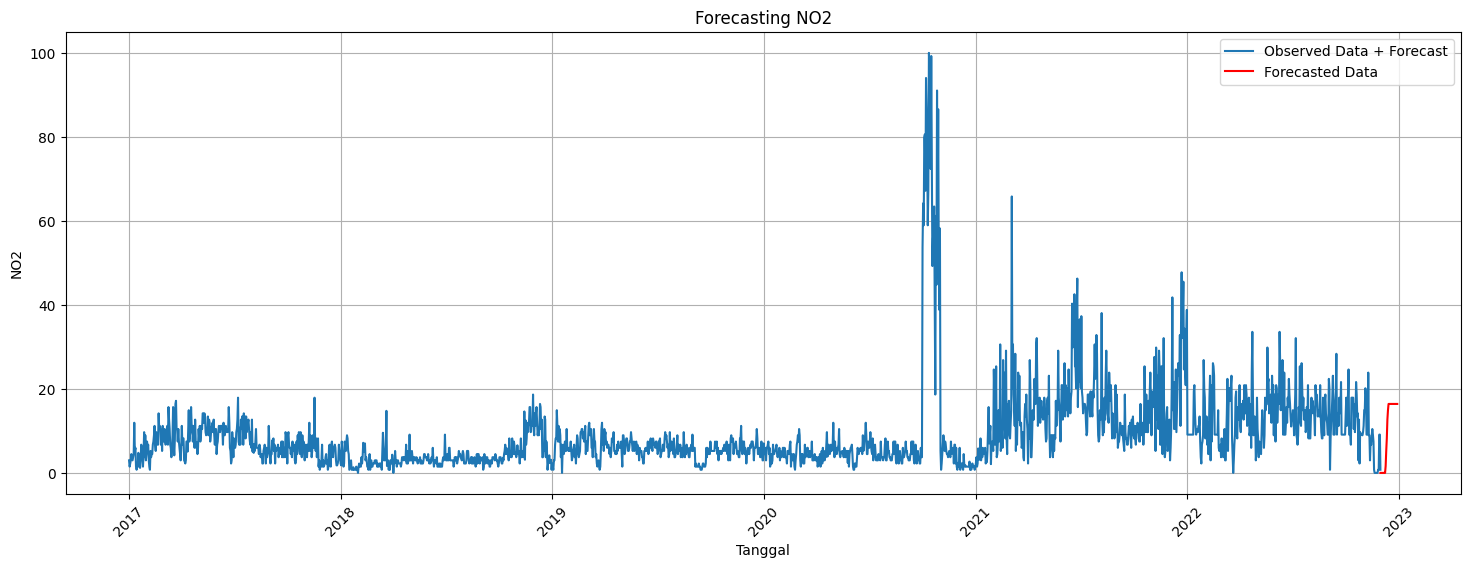

In [93]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['NO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['NO2'].min()
max_par = DKI5['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.071
MSE: 0.005
MAE: 0.059
R-Squared: -0.212
       Tanggal       NO2
0   2022-11-30  4.477612
1   2022-12-01  4.477612
2   2022-12-02  4.477612
3   2022-12-03  4.477612
4   2022-12-04  4.477612
5   2022-12-05  4.477612
6   2022-12-06  4.477612
7   2022-12-07  4.477612
8   2022-12-08  4.477612
9   2022-12-09  4.477612
10  2022-12-10  4.477612
11  2022-12-11  4.477612
12  2022-12-12  4.477612
13  2022-12-13  4.477612
14  2022-12-14  4.477612
15  2022-12-15  4.477612
16  2022-12-16  4.477612
17  2022-12-17  4.477612
18  2022-12-18  4.477612
19  2022-12-19  4.477612
20  2022-12-20  4.477612
21  2022-12-21  4.477612
22  2022-12-22  4.477612
23  2022-12-23  4.477612
24  2022-12-24  4.477612
25  2022-12-25  4.477612
26  2022-12-26  4.477612
27  2022-12-27  4.477612
28  2022-12-28  4.477612
29  2022-12-29  4.477612


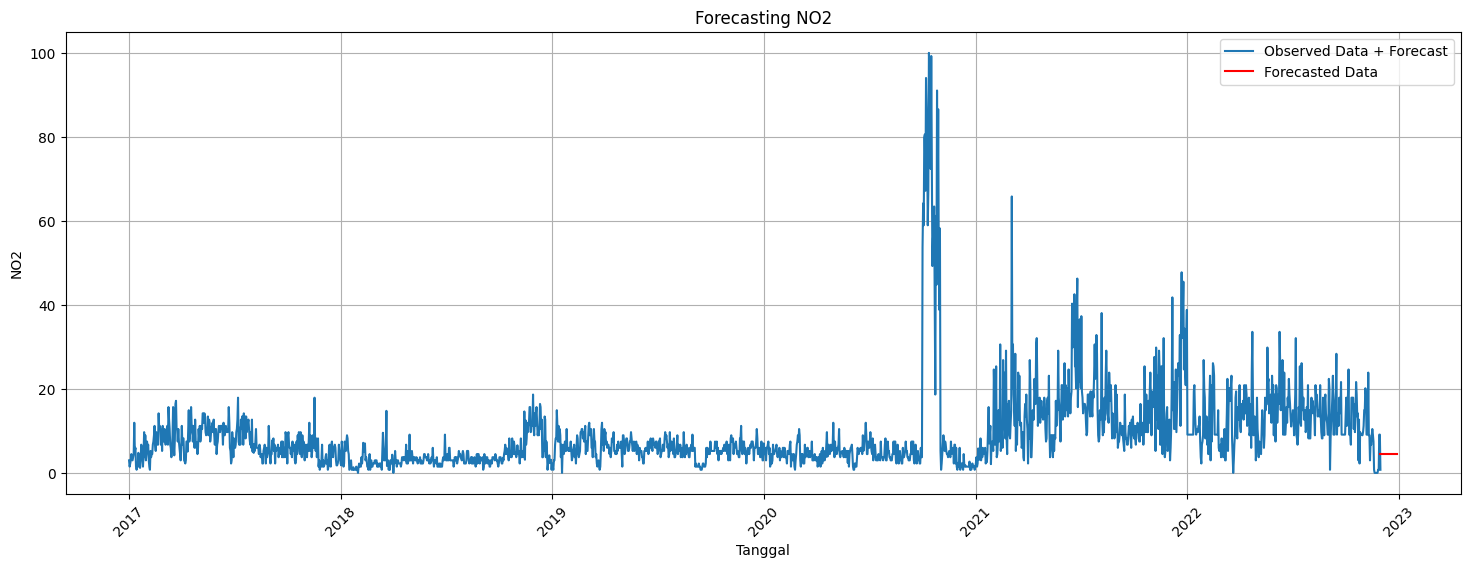

In [95]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['NO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['NO2'].min()
max_par = DKI5['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.065
MSE: 0.004
MAE: 0.053
R-Squared: -0.025
       Tanggal      NO2
0   2022-11-30  6.41791
1   2022-12-01  6.41791
2   2022-12-02  6.41791
3   2022-12-03  6.41791
4   2022-12-04  6.41791
5   2022-12-05  6.41791
6   2022-12-06  6.41791
7   2022-12-07  6.41791
8   2022-12-08  6.41791
9   2022-12-09  6.41791
10  2022-12-10  6.41791
11  2022-12-11  6.41791
12  2022-12-12  6.41791
13  2022-12-13  6.41791
14  2022-12-14  6.41791
15  2022-12-15  6.41791
16  2022-12-16  6.41791
17  2022-12-17  6.41791
18  2022-12-18  6.41791
19  2022-12-19  6.41791
20  2022-12-20  6.41791
21  2022-12-21  6.41791
22  2022-12-22  6.41791
23  2022-12-23  6.41791
24  2022-12-24  6.41791
25  2022-12-25  6.41791
26  2022-12-26  6.41791
27  2022-12-27  6.41791
28  2022-12-28  6.41791
29  2022-12-29  6.41791


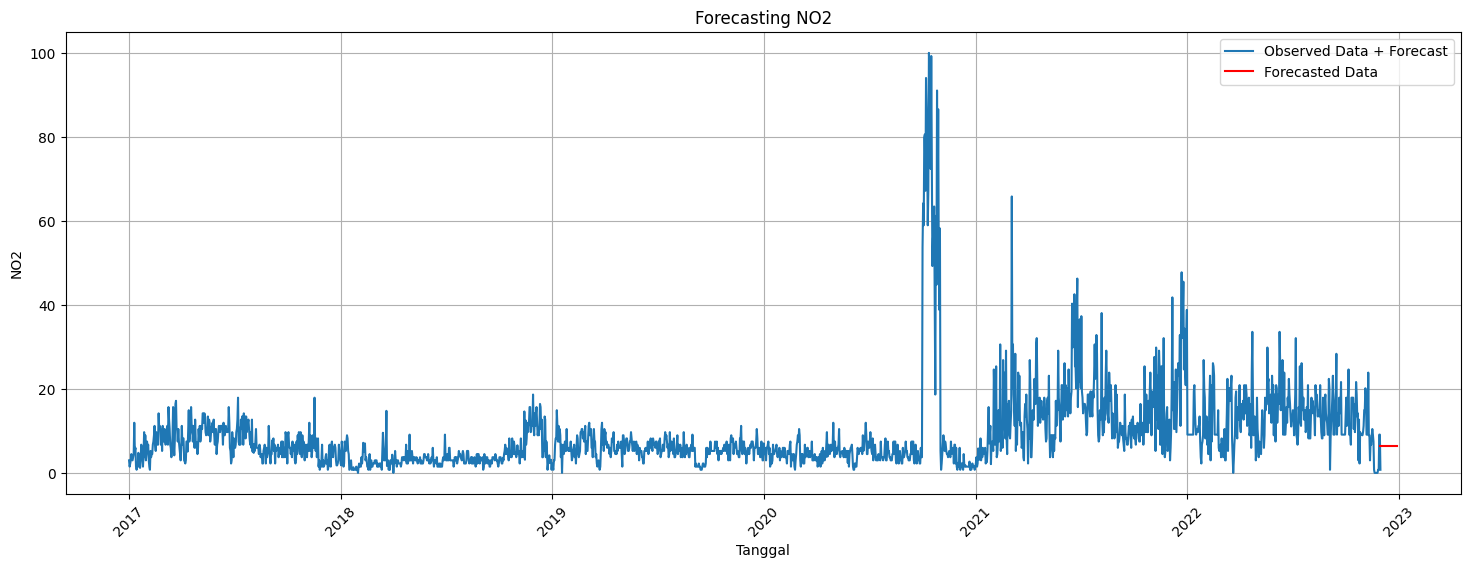

In [97]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['NO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['NO2'].min()
max_par = DKI5['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.065
MSE: 0.004
MAE: 0.053
R-Squared: -0.025
       Tanggal      NO2
0   2022-11-30  6.41791
1   2022-12-01  6.41791
2   2022-12-02  6.41791
3   2022-12-03  6.41791
4   2022-12-04  6.41791
5   2022-12-05  6.41791
6   2022-12-06  6.41791
7   2022-12-07  6.41791
8   2022-12-08  6.41791
9   2022-12-09  6.41791
10  2022-12-10  6.41791
11  2022-12-11  6.41791
12  2022-12-12  6.41791
13  2022-12-13  6.41791
14  2022-12-14  6.41791
15  2022-12-15  6.41791
16  2022-12-16  6.41791
17  2022-12-17  6.41791
18  2022-12-18  6.41791
19  2022-12-19  6.41791
20  2022-12-20  6.41791
21  2022-12-21  6.41791
22  2022-12-22  6.41791
23  2022-12-23  6.41791
24  2022-12-24  6.41791
25  2022-12-25  6.41791
26  2022-12-26  6.41791
27  2022-12-27  6.41791
28  2022-12-28  6.41791
29  2022-12-29  6.41791


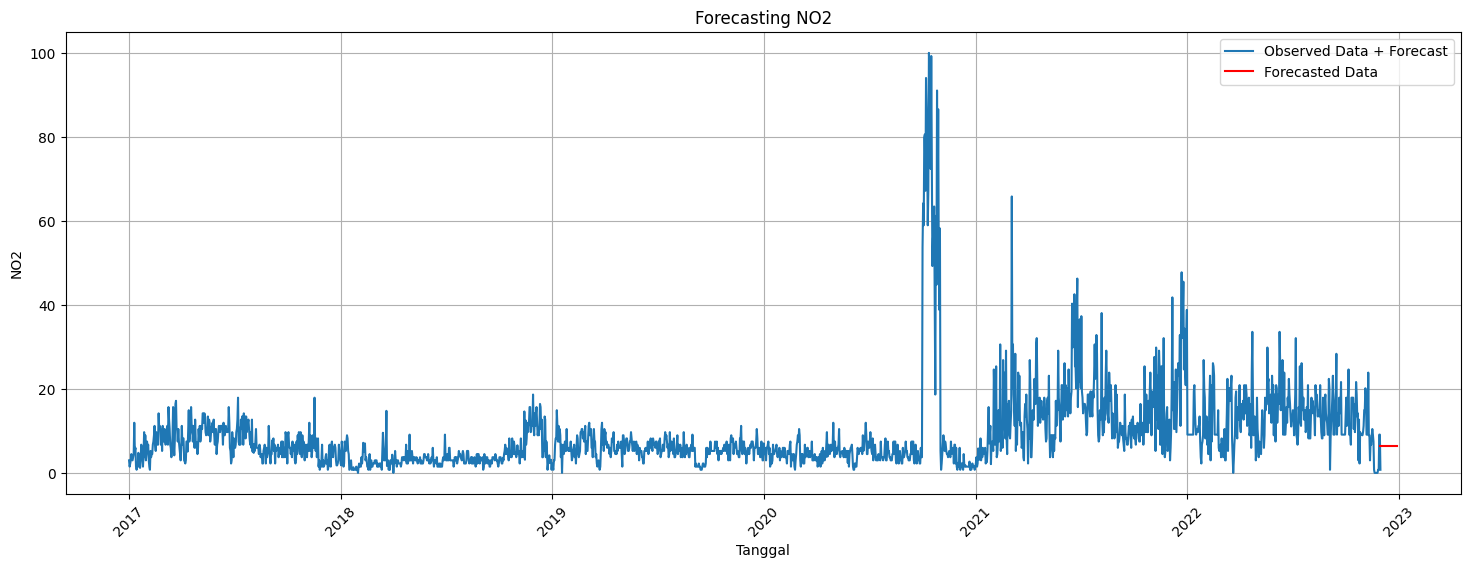

In [99]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['NO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
